# NIPS Publications Analysis

## 1. Background

The purpose of this project is to use data on research papers from the Neural information Processing Systems (NIPS) conferences to investigate trends in machine learning research over time.

## 2. Import modules

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import wordcloud

## 3. Load NIPS data

In [11]:
# Read '~/Documents/data/NIPS_publications_analysis/papers.csv' into papers
papers = pd.read_csv('~/Documents/data/NIPS_publications_analysis/papers.csv')

In [12]:
# Print out the first rows of papers
print(papers.head())

     id  year                                              title event_type  \
0     1  1987  Self-Organization of Associative Database and ...        NaN   
1    10  1987  A Mean Field Theory of Layer IV of Visual Cort...        NaN   
2   100  1988  Storing Covariance by the Associative Long-Ter...        NaN   
3  1000  1994  Bayesian Query Construction for Neural Network...        NaN   
4  1001  1994  Neural Network Ensembles, Cross Validation, an...        NaN   

                                            pdf_name          abstract  \
0  1-self-organization-of-associative-database-an...  Abstract Missing   
1  10-a-mean-field-theory-of-layer-iv-of-visual-c...  Abstract Missing   
2  100-storing-covariance-by-the-associative-long...  Abstract Missing   
3  1000-bayesian-query-construction-for-neural-ne...  Abstract Missing   
4  1001-neural-network-ensembles-cross-validation...  Abstract Missing   

                                          paper_text  
0  767\n\nSELF-ORGANIZATI

## 4. Prepare the data for analysis

For our analysis, we only need to keep each paper's text data as well as the year in which it was published. The other columns can therefore be removed.

In [13]:
# Print out the column names of papers
papers.columns

Index(['id', 'year', 'title', 'event_type', 'pdf_name', 'abstract',
       'paper_text'],
      dtype='object')

In [14]:
# Drop the columns: 'id', 'event_type', and 'pdf_name'
papers = papers.drop(columns=['id', 'event_type', 'pdf_name'])

In [15]:
# Print out the column names of papers
papers.columns

Index(['year', 'title', 'abstract', 'paper_text'], dtype='object')

In [16]:
# Print out the first rows of papers
print(papers.head())

   year                                              title          abstract  \
0  1987  Self-Organization of Associative Database and ...  Abstract Missing   
1  1987  A Mean Field Theory of Layer IV of Visual Cort...  Abstract Missing   
2  1988  Storing Covariance by the Associative Long-Ter...  Abstract Missing   
3  1994  Bayesian Query Construction for Neural Network...  Abstract Missing   
4  1994  Neural Network Ensembles, Cross Validation, an...  Abstract Missing   

                                          paper_text  
0  767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...  
1  683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...  
2  394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...  
3  Bayesian Query Construction for Neural\nNetwor...  
4  Neural Network Ensembles, Cross\nValidation, a...  


## 5. Visualise evolution of machine learning research over time

In [21]:
# Group the data by year
groups = papers.groupby('year')

In [27]:
# Find the size of each group
counts = groups.size()

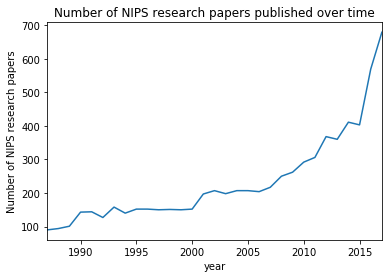

In [32]:
# Plot the numbers of papers published each year
counts.plot(kind='line')
plt.title('Number of NIPS research papers published over time')
plt.ylabel('Number of NIPS research papers')
plt.show()

## 6. Preprocess text data

In [35]:
# Print the titles of the first rows 
print(papers['title'].head())

0    Self-Organization of Associative Database and ...
1    A Mean Field Theory of Layer IV of Visual Cort...
2    Storing Covariance by the Associative Long-Ter...
3    Bayesian Query Construction for Neural Network...
4    Neural Network Ensembles, Cross Validation, an...
Name: title, dtype: object


In [40]:
# Remove punctuation
papers['title_processed'] = papers['title'].map(lambda x: re.sub('[,\.!?:]', '', x))

# Convert the titles to lowercase
papers['title_processed'] = papers['title_processed'].str.lower()

# Print the processed titles of the first rows 
print(papers['title_processed'].head())

0    self-organization of associative database and ...
1    a mean field theory of layer iv of visual cort...
2    storing covariance by the associative long-ter...
3    bayesian query construction for neural network...
4    neural network ensembles cross validation and ...
Name: title_processed, dtype: object


## 7. Visualise preprocessed text data with a word cloud

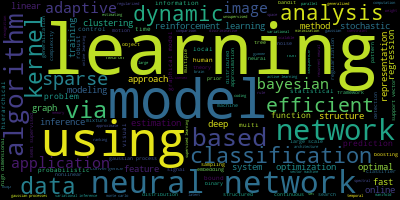

In [45]:
# Join the different processed titles together.
long_string = ' '.join(papers['title_processed'])

# Create a WordCloud object
wc = wordcloud.WordCloud()

# Generate a wordcloud using long_string
wc.generate(long_string)

# Display wordcloud
wc.to_image()

'self-organization of associative database and its applications a mean field theory of layer iv of visual cortex and its application to artificial neural networks storing covariance by the associative long-term potentiation and depression of synaptic strengths in the hippocampus bayesian query construction for neural network models neural network ensembles cross validation and active learning using a neural net to instantiate a deformable model plasticity-mediated competitive learning iceg morphology classification using an analogue vlsi neural network real-time control of a tokamak plasma using neural networks pulsestream synapses with non-volatile analogue amorphous-silicon memories learning to play the game of chess multidimensional scaling and data clustering an experimental comparison of recurrent neural networks training multilayer perceptrons with the extended kalman algorithm interference in learning internal models of inverse dynamics in humans active learning with statistical